In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('diabetes_risk_prediction_dataset.csv')

In [3]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [5]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
encode

LabelEncoder()

In [6]:
for col in ['class']:
    df[col] = encode.fit_transform(df[col])
    

In [7]:
df['class'].value_counts()

class
1    320
0    200
Name: count, dtype: int64

In [8]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [9]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [10]:
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)


In [12]:
X = df[['Age', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']]
y = df['class']

In [15]:
X_encoded = pd.get_dummies(X)

In [16]:
from sklearn.model_selection import train_test_split

# separate the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
import torch
train_input = torch.tensor(X_train_scaled, dtype=torch.float32)
train_label = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
test_input = torch.tensor(X_test_scaled, dtype=torch.float32)
test_label = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

In [19]:
test_input

tensor([[ 1.9420, -1.0293,  1.0293,  ...,  1.3179,  0.4342, -0.4342],
        [-0.6775, -1.0293,  1.0293,  ..., -0.7588,  0.4342, -0.4342],
        [ 0.7141, -1.0293,  1.0293,  ..., -0.7588,  0.4342, -0.4342],
        ...,
        [ 1.4509, -1.0293,  1.0293,  ..., -0.7588,  0.4342, -0.4342],
        [-0.1864,  0.9716, -0.9716,  ...,  1.3179,  0.4342, -0.4342],
        [-1.4961,  0.9716, -0.9716,  ..., -0.7588,  0.4342, -0.4342]])

In [20]:
# Check for NaNs
assert not torch.isnan(train_input).any(), "NaNs found in train_input"
assert not torch.isnan(train_label).any(), "NaNs found in train_label"
assert not torch.isnan(test_input).any(), "NaNs found in test_input"
assert not torch.isnan(test_label).any(), "NaNs found in test_label"
assert not torch.isnan(test_input).any(), "NaNs found in test_input"
assert not torch.isnan(test_label).any(), "NaNs found in test_label"
assert not torch.isinf(test_input).any(), "Infs found in test_input"
assert not torch.isinf(test_label).any(), "Infs found in test_label"



In [21]:
dataset = {
    'train_input': train_input,
    'train_label': train_label,
    'test_input': train_input,  # Assuming no separate test set for now
    'test_label': train_label
}

In [22]:
dataset

{'train_input': tensor([[ 0.3867, -1.0293,  1.0293,  ...,  1.3179,  0.4342, -0.4342],
         [-0.5957, -1.0293,  1.0293,  ..., -0.7588, -2.3028,  2.3028],
         [ 0.4685,  0.9716, -0.9716,  ...,  1.3179,  0.4342, -0.4342],
         ...,
         [-0.6775, -1.0293,  1.0293,  ..., -0.7588,  0.4342, -0.4342],
         [ 0.7141, -1.0293,  1.0293,  ..., -0.7588,  0.4342, -0.4342],
         [ 3.4156,  0.9716, -0.9716,  ...,  1.3179,  0.4342, -0.4342]]),
 'train_label': tensor([[1.],
         [1.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [1.],
         [0.],
         [0.],
         [0.],
         [1.],
         [0.],
         [0.],
         [1.],
         [0.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [0.],
         [1.],
         [0.],
         [1.],
         [1.],
         [1.],
         [1.],
         [0.],
         [1.],
         [1.],
         [1.],
         [0.],
   

In [23]:
from kan import KAN, create_dataset

# Initialize KAN model
input_dim = train_input.shape[1]
output_dim = 1
model = KAN(width=[input_dim, 5, output_dim], grid=5, k=3, seed=0)


In [24]:
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)


train loss: 2.59e-01 | test loss: 2.59e-01 | reg: 5.45e+01 : 100%|██| 20/20 [01:38<00:00,  4.93s/it]


{'train_loss': [array(0.30091588),
  array(0.29385696),
  array(0.2922326),
  array(0.2873218),
  array(0.28382943),
  array(0.27439132),
  array(0.26639734),
  array(0.26546733),
  array(0.26328931),
  array(0.26247204),
  array(0.25939663),
  array(0.25960491),
  array(0.25970686),
  array(0.25928698),
  array(0.25893769),
  array(0.25903541),
  array(0.25898076),
  array(0.25892702),
  array(0.25884347),
  array(0.25854886)],
 'test_loss': [array(0.30091588),
  array(0.29385696),
  array(0.2922326),
  array(0.2873218),
  array(0.28382943),
  array(0.27439132),
  array(0.26639734),
  array(0.26546733),
  array(0.26328931),
  array(0.26247204),
  array(0.25939663),
  array(0.25960491),
  array(0.25970686),
  array(0.25928698),
  array(0.25893769),
  array(0.25903541),
  array(0.25898076),
  array(0.25892702),
  array(0.25884347),
  array(0.25854886)],
 'reg': [array(67.14887301),
  array(62.62241029),
  array(61.02505739),
  array(59.78711598),
  array(58.36557235),
  array(62.6549358

train loss: 2.61e-01 | test loss: 2.61e-01 | reg: 5.41e+01 : 100%|██| 20/20 [01:37<00:00,  4.86s/it]


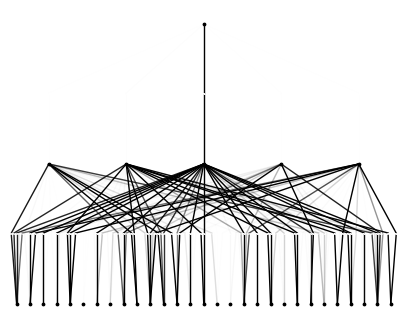

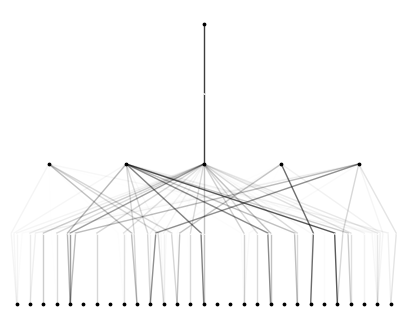

In [25]:
# Plot KAN at initialization
model(dataset['train_input'])
model.plot(beta=100)

# Train the model
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)

# Plot trained KAN
model.plot()

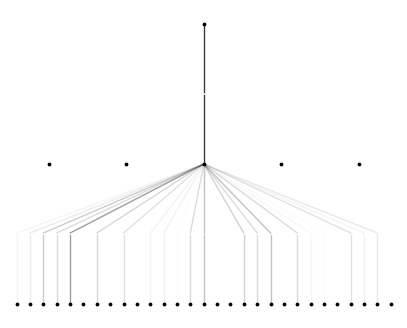

In [26]:
# Prune the model
# pruning it
model.prune()
model.plot(mask=True)

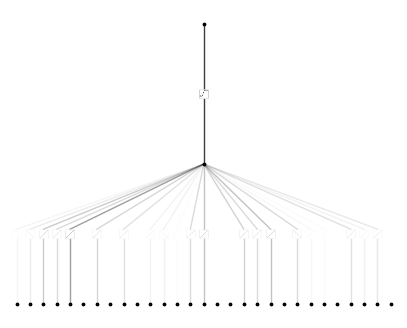

In [27]:
#prune for a smaller shape
model = model.prune()
model(dataset['train_input'])
model.plot()

In [28]:
# continue the training
model.train(dataset, opt="LBFGS", steps=50)

train loss: 2.50e-01 | test loss: 2.50e-01 | reg: 1.33e+01 : 100%|██| 50/50 [01:20<00:00,  1.61s/it]


{'train_loss': [array(0.2470003),
  array(0.23534571),
  array(0.22220505),
  array(0.22088887),
  array(0.22019441),
  array(0.23183095),
  array(0.22351786),
  array(0.21724855),
  array(0.21446483),
  array(0.21412166),
  array(0.2336649),
  array(0.22162854),
  array(0.21555275),
  array(0.21382767),
  array(0.21367235),
  array(0.24479047),
  array(0.23495502),
  array(0.23146036),
  array(0.2297435),
  array(0.22740455),
  array(0.24565203),
  array(0.24218437),
  array(0.24162585),
  array(0.24061331),
  array(0.24031816),
  array(0.24948877),
  array(0.24720024),
  array(0.24647269),
  array(0.24593306),
  array(0.24535893),
  array(0.24891943),
  array(0.24840249),
  array(0.24756843),
  array(0.24668663),
  array(0.24480606),
  array(0.25379176),
  array(0.25325009),
  array(0.25095753),
  array(0.25077662),
  array(0.25047381),
  array(0.2517344),
  array(0.25134836),
  array(0.25129071),
  array(0.25093701),
  array(0.25071524),
  array(0.25135864),
  array(0.25118954),
  a

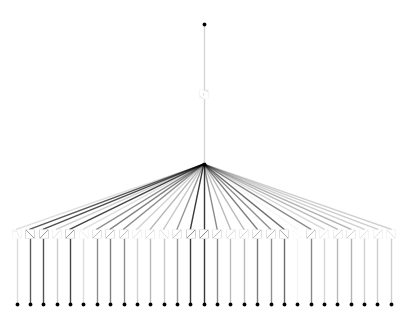

In [29]:
model.plot()

description:   0%|                                                           | 0/50 [00:00<?, ?it/s]

train loss: 2.52e-01 | test loss: 2.52e-01 | reg: 1.33e+01 : 100%|██| 50/50 [01:18<00:00,  1.56s/it]


fixing (0,0,0) with tanh, r2=0.9494841303114548
fixing (0,1,0) with exp, r2=1.0000000000000018
fixing (0,2,0) with exp, r2=1.000000000000002


/home/ebuka/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


ValueError: array must not contain infs or NaNs

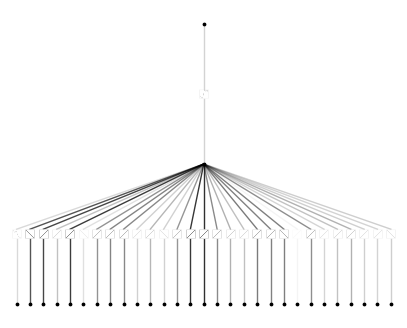

In [30]:
model.train(dataset, opt="LBFGS", steps=50)
model.plot()

#automatically/manually set activation functions
mode = "auto"
if mode == "auto":
    lib = ['x', 'x^2', 'x^3','x^4', 'exp', 'log', 'sqrt', 'tanh', 'sin', 'abs']
    model.auto_symbolic(lib=lib)

In [31]:
model.train(dataset, opt="LBFGS", steps=50, lr=0.001)
symbolic_formula = model.symbolic_formula()[0][0]
print(symbolic_formula)

train loss: 2.53e-01 | test loss: 2.53e-01 | reg: 1.33e+01 : 100%|██| 50/50 [01:03<00:00,  1.26s/it]


make sure all activations need to be converted to symbolic formulas first!


TypeError: 'NoneType' object is not subscriptable